# Import Library

In [272]:
import pandas as pd
import numpy as np
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Import Data Set

In [273]:
#////////////////////////////////////////////////////////////#
# Import data
#////////////////////////////////////////////////////////////#

data_import = pd.read_csv("netflix daily top 10.csv")
data_import

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
...,...,...,...,...,...,...,...,...,...,...
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33


# Data Cleaning

In [ ]:
# datetime, dtypes, etc

# Univariate Analysis
## common Data Types

In [274]:
#////////////////////////////////////////////////////////////#
# Data Types
#////////////////////////////////////////////////////////////#

data_import.dtypes

As of                   object
Rank                     int64
Year to Date Rank       object
Last Week Rank          object
Title                   object
Type                    object
Netflix Exclusive       object
Netflix Release Date    object
Days In Top 10           int64
Viewership Score         int64
dtype: object

<AxesSubplot:>

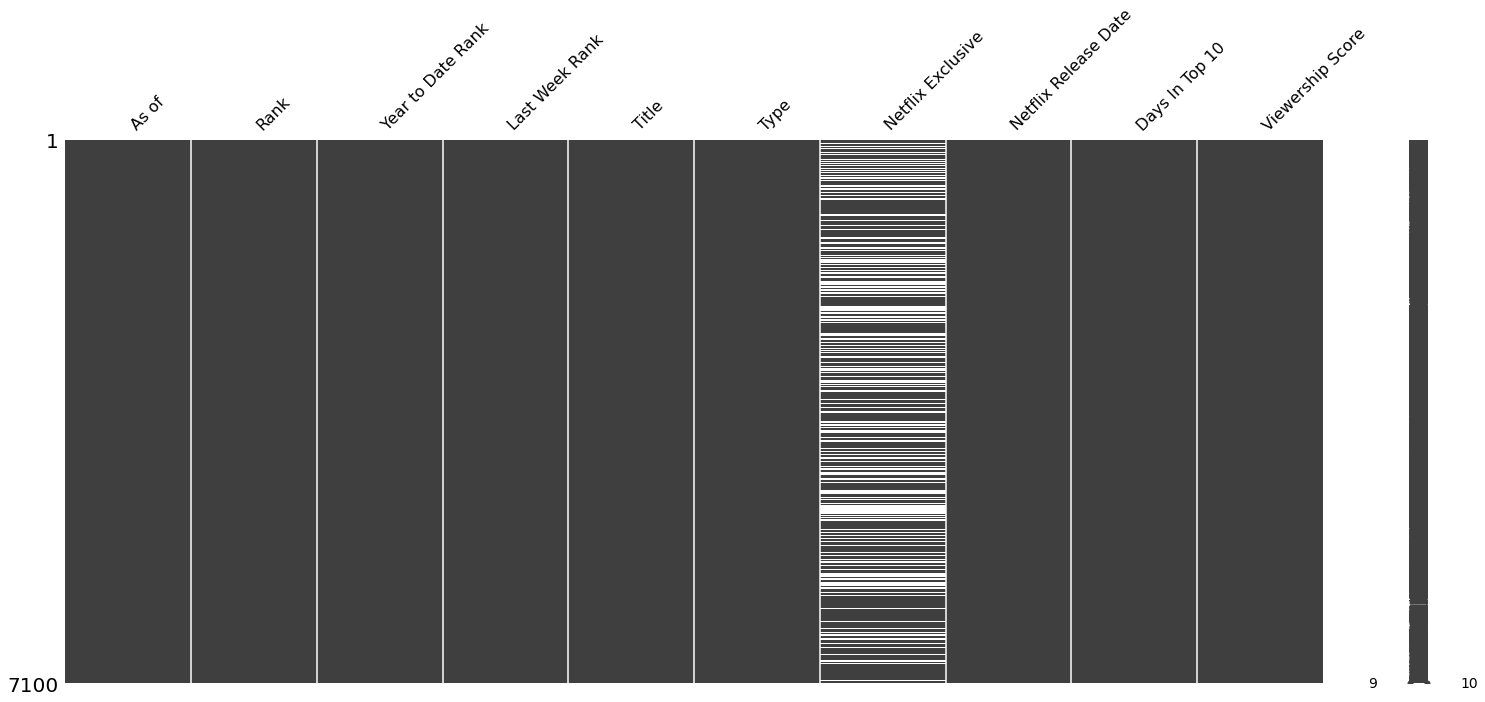

In [275]:
#////////////////////////////////////////////////////////////#
# Missing Values
#////////////////////////////////////////////////////////////#

msno.matrix(data_import)

<AxesSubplot:>

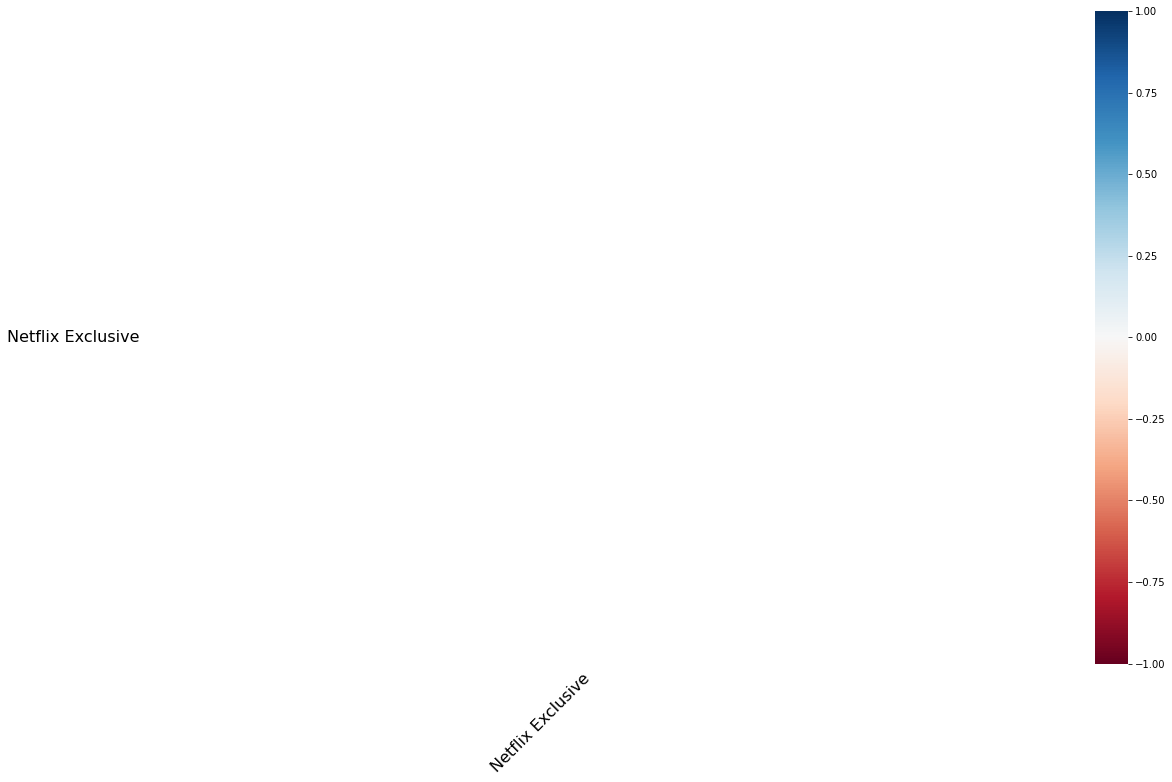

In [276]:
#////////////////////////////////////////////////////////////#
# Missing Values Heatmap
#////////////////////////////////////////////////////////////#
msno.heatmap(data_import)

## Numerical Data Types

In [277]:
#////////////////////////////////////////////////////////////#
# Quantile / Descriptive Statistics
#////////////////////////////////////////////////////////////#

data_import.describe()

,Rank,Days In Top 10,Viewership Score
count,7100.000000,7100.000000,7100.000000
mean,5.500000,24.123662,122.790141
std,2.872484,58.473789,213.861642
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,19.000000
50%,5.500000,7.000000,50.000000
75%,8.000000,18.000000,128.000000
max,10.000000,428.000000,1474.000000


In [278]:
#////////////////////////////////////////////////////////////#
# violin plot of data
#////////////////////////////////////////////////////////////#

px.violin(
    data_import,
    x="Days In Top 10",
    box=True,
    points='all'
)

In [279]:
data_import[data_import['Days In Top 10']==data_import['Days In Top 10'].max()]
agg_df = data_import.groupby("Title").max().sort_values(by='Days In Top 10', ascending=False)
agg_df

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
6998,2022-03-01,9,-,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",428,1474


,As of,Rank,Year to Date Rank,Last Week Rank,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
Title,,,,,,,,,
Cocomelon,2022-03-01,10,9,9,TV Show,NaN,"Jun 1, 2020",428,1474
Ozark,2022-03-01,10,9,9,TV Show,Yes,"Jul 21, 2017",89,536
Cobra Kai,2022-01-28,10,9,8,TV Show,NaN,"Aug 28, 2020",81,582
Manifest,2021-09-17,10,9,7,TV Show,NaN,"Jun 10, 2021",80,590
The Queenâs Gambit,2021-01-06,10,9,9,TV Show,Yes,"Oct 23, 2020",73,446
...,...,...,...,...,...,...,...,...,...
Dark Shadows,2022-01-05,10,-,-,Movie,NaN,"Jan 1, 2022",1,1
Elves,2021-11-29,8,-,-,TV Show,Yes,"Nov 28, 2021",1,3
Rango,2021-01-01,8,-,-,Movie,NaN,"Dec 28, 2020",1,3


In [280]:
#////////////////////////////////////////////////////////////#
# violin plot of aggregated data
#////////////////////////////////////////////////////////////#
px.violin(
    agg_df,
    x="Days In Top 10",
    box=True,
    points='all'
)

In [281]:
#////#
#Histogram and Violin plot
#////#
px.histogram(
    agg_df,
    x="Days In Top 10",
    nbins=1000,
    marginal='violin',
    range_x=[0,agg_df['Days In Top 10'].max()]
)

<Figure size 1080x648 with 0 Axes>

<AxesSubplot:xlabel='Days In Top 10', ylabel='Count'>

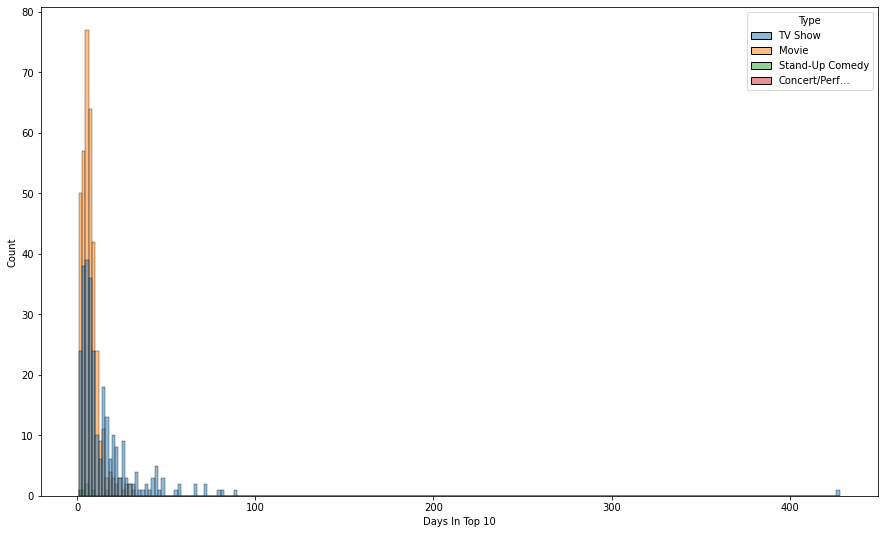

In [282]:
plt.figure(figsize=[15,9])
sns.histplot(data=agg_df,x='Days In Top 10',hue='Type')

## Categorical Data Types

In [283]:
#////////////////////////////////////////////////////////////#
# Cardinality / Unique Counts
#////////////////////////////////////////////////////////////#

def cardinality_pareto(dataframe, column):
    temp = dataframe[column].value_counts().reset_index()
    temp['PercentOfTotal'] = temp[column] / temp[column].sum()
    temp['PercentRunningTotal'] = temp["PercentOfTotal"].cumsum()
    return temp

cardinality_pareto(agg_df,"Type")

,index,Type,PercentOfTotal,PercentRunningTotal
0,Movie,355,0.550388,0.550388
1,TV Show,283,0.438760,0.989147
2,Stand-Up Comedy,6,0.009302,0.998450
3,Concert/Perf…,1,0.001550,1.000000


In [284]:
agg_df

,As of,Rank,Year to Date Rank,Last Week Rank,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
Title,,,,,,,,,
Cocomelon,2022-03-01,10,9,9,TV Show,NaN,"Jun 1, 2020",428,1474
Ozark,2022-03-01,10,9,9,TV Show,Yes,"Jul 21, 2017",89,536
Cobra Kai,2022-01-28,10,9,8,TV Show,NaN,"Aug 28, 2020",81,582
Manifest,2021-09-17,10,9,7,TV Show,NaN,"Jun 10, 2021",80,590
The Queenâs Gambit,2021-01-06,10,9,9,TV Show,Yes,"Oct 23, 2020",73,446
...,...,...,...,...,...,...,...,...,...
Dark Shadows,2022-01-05,10,-,-,Movie,NaN,"Jan 1, 2022",1,1
Elves,2021-11-29,8,-,-,TV Show,Yes,"Nov 28, 2021",1,3
Rango,2021-01-01,8,-,-,Movie,NaN,"Dec 28, 2020",1,3


In [285]:
agg_df['Year'] = agg_df['Netflix Release Date'].str[-4:]
cardinality_pareto(agg_df,"Year")

,index,Year,PercentOfTotal,PercentRunningTotal
0,2021,260,0.403101,0.403101
1,2020,244,0.378295,0.781395
2,2022,43,0.066667,0.848062
3,2019,28,0.043411,0.891473
4,2018,26,0.040310,0.931783
5,2017,12,0.018605,0.950388
6,2014,12,0.018605,0.968992
7,2016,9,0.013953,0.982946
8,2015,8,0.012403,0.995349
9,2013,2,0.003101,0.998450


In [286]:
agg_df['Netflix Exclusive'] = agg_df['Netflix Exclusive'].fillna(value='No')
agg_df

,As of,Rank,Year to Date Rank,Last Week Rank,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score,Year
Title,,,,,,,,,,
Cocomelon,2022-03-01,10,9,9,TV Show,No,"Jun 1, 2020",428,1474,2020
Ozark,2022-03-01,10,9,9,TV Show,Yes,"Jul 21, 2017",89,536,2017
Cobra Kai,2022-01-28,10,9,8,TV Show,No,"Aug 28, 2020",81,582,2020
Manifest,2021-09-17,10,9,7,TV Show,No,"Jun 10, 2021",80,590,2021
The Queenâs Gambit,2021-01-06,10,9,9,TV Show,Yes,"Oct 23, 2020",73,446,2020
...,...,...,...,...,...,...,...,...,...,...
Dark Shadows,2022-01-05,10,-,-,Movie,No,"Jan 1, 2022",1,1,2022
Elves,2021-11-29,8,-,-,TV Show,Yes,"Nov 28, 2021",1,3,2021
Rango,2021-01-01,8,-,-,Movie,No,"Dec 28, 2020",1,3,2020


<Figure size 1080x648 with 0 Axes>

<AxesSubplot:xlabel='Title', ylabel='Days In Top 10'>

C:\Users\Jason Chau\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 128 (\x80) missing from current font.

C:\Users\Jason Chau\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 153 (\x99) missing from current font.



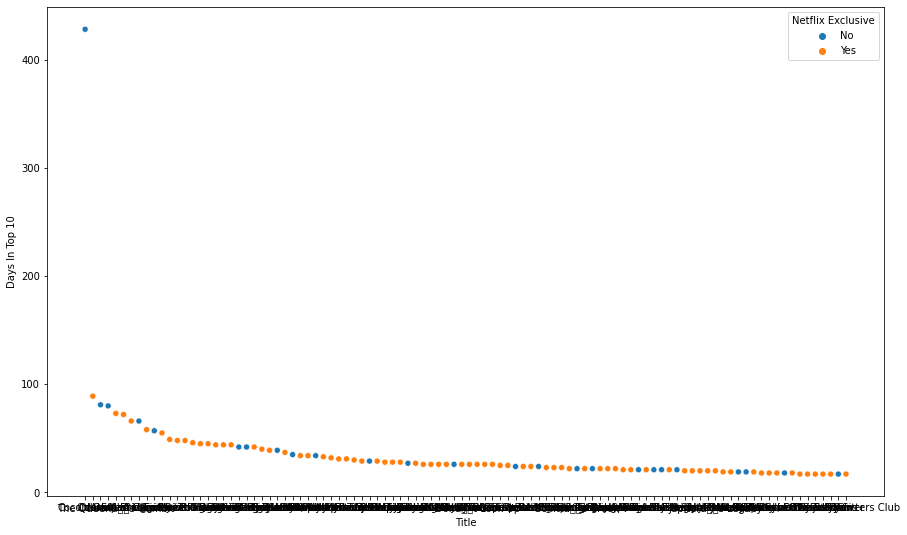

In [287]:
plt.figure(figsize=[15,9])
sns.scatterplot(data=agg_df.head(100),x='Title',y='Days In Top 10',hue='Netflix Exclusive')

In [288]:
cardinality_pareto(agg_df,"Netflix Exclusive")

,index,Netflix Exclusive,PercentOfTotal,PercentRunningTotal
0,Yes,409,0.634109,0.634109
1,No,236,0.365891,1.000000


<Figure size 1080x648 with 0 Axes>

<AxesSubplot:xlabel='Days In Top 10', ylabel='Count'>

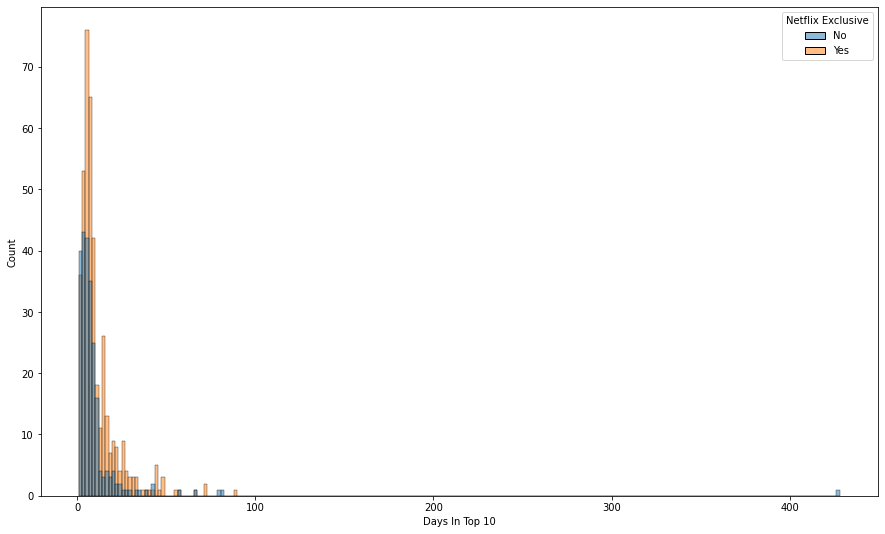

In [289]:
plt.figure(figsize=[15,9])
sns.histplot(data=agg_df,x='Days In Top 10',hue='Netflix Exclusive')

# Textual Analysis

In [290]:
#////////////////////////////////////////////////////////////#
# Tokens
#////////////////////////////////////////////////////////////#

In [291]:
#////////////////////////////////////////////////////////////#
# TF / DF
#////////////////////////////////////////////////////////////#

# Date Data Types

In [292]:
#////////////////////////////////////////////////////////////#
# Histogram
#////////////////////////////////////////////////////////////#
agg_df['As of'] = pd.to_datetime(agg_df['As of'])
agg_df['Netflix Release Date'] = pd.to_datetime(agg_df['Netflix Release Date'])

In [293]:
agg_df['Month']= agg_df['Netflix Release Date'].dt.month
agg_df

,As of,Rank,Year to Date Rank,Last Week Rank,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score,Year,Month
Title,,,,,,,,,,,
Cocomelon,2022-03-01,10,9,9,TV Show,No,2020-06-01,428,1474,2020,6
Ozark,2022-03-01,10,9,9,TV Show,Yes,2017-07-21,89,536,2017,7
Cobra Kai,2022-01-28,10,9,8,TV Show,No,2020-08-28,81,582,2020,8
Manifest,2021-09-17,10,9,7,TV Show,No,2021-06-10,80,590,2021,6
The Queenâs Gambit,2021-01-06,10,9,9,TV Show,Yes,2020-10-23,73,446,2020,10
...,...,...,...,...,...,...,...,...,...,...,...
Dark Shadows,2022-01-05,10,-,-,Movie,No,2022-01-01,1,1,2022,1
Elves,2021-11-29,8,-,-,TV Show,Yes,2021-11-28,1,3,2021,11
Rango,2021-01-01,8,-,-,Movie,No,2020-12-28,1,3,2020,12


In [294]:
agg_df['Year'] = agg_df['Year'].astype('int64')
agg_df['Year']

Title
Cocomelon                     2020
Ozark                         2017
Cobra Kai                     2020
Manifest                      2021
The Queenâs Gambit          2020
                              ... 
Dark Shadows                  2022
Elves                         2021
Rango                         2020
One on One                    2020
Jojoâs Bizarre Adventure    2019
Name: Year, Length: 645, dtype: int64

In [295]:
agg_df.groupby('Month').count().reset_index()#.hist()
fig = px.histogram(x = agg_df['Month'])
fig.update_layout(bargap=0.2)

,Month,As of,Rank,Year to Date Rank,Last Week Rank,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score,Year
0,1,58,58,58,58,58,58,58,58,58,58
1,2,43,43,43,43,43,43,43,43,43,43
2,3,54,54,54,54,54,54,54,54,54,54
3,4,59,59,59,59,59,59,59,59,59,59
4,5,49,49,49,49,49,49,49,49,49,49
5,6,38,38,38,38,38,38,38,38,38,38
6,7,58,58,58,58,58,58,58,58,58,58
7,8,56,56,56,56,56,56,56,56,56,56
8,9,65,65,65,65,65,65,65,65,65,65
9,10,52,52,52,52,52,52,52,52,52,52


In [296]:
agg_df.groupby('Month').mean().reset_index()#.hist()

,Month,Rank,Days In Top 10,Viewership Score,Year
0,1,9.137931,9.827586,51.431034,2020.741379
1,2,9.232558,12.534884,73.906977,2020.906977
2,3,8.907407,10.500000,64.018519,2020.407407
3,4,9.254237,10.644068,60.338983,2020.271186
4,5,9.306122,11.632653,63.387755,2019.959184
5,6,9.315789,23.052632,106.631579,2019.921053
6,7,9.551724,10.448276,55.844828,2019.948276
7,8,9.142857,9.285714,52.392857,2019.857143
8,9,9.092308,9.430769,53.107692,2019.615385
9,10,9.307692,10.903846,57.115385,2019.826923


In [297]:
# How release month affect Days in Top 10
# 
px.bar(data_frame=agg_df.groupby('Month').mean().reset_index(),x='Month',y='Days In Top 10')
px.bar(data_frame=agg_df,x='Month',y='Days In Top 10')

In [298]:
# How release Year affect Days in Top 10
# 
px.bar(data_frame=agg_df.groupby('Year').mean().reset_index(),x='Year',y='Days In Top 10')
px.bar(data_frame=agg_df,x='Year',y='Days In Top 10')

# Bivariate Analysis

## Correlation Analysis

In [299]:
#////////////////////////////////////////////////////////////#
# Qualitative Analysis
#////////////////////////////////////////////////////////////#

# Contingency Tables
agg_df
pd.crosstab(agg_df['Days In Top 10'],agg_df['Type'],margins=False)

,As of,Rank,Year to Date Rank,Last Week Rank,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score,Year,Month
Title,,,,,,,,,,,
Cocomelon,2022-03-01,10,9,9,TV Show,No,2020-06-01,428,1474,2020,6
Ozark,2022-03-01,10,9,9,TV Show,Yes,2017-07-21,89,536,2017,7
Cobra Kai,2022-01-28,10,9,8,TV Show,No,2020-08-28,81,582,2020,8
Manifest,2021-09-17,10,9,7,TV Show,No,2021-06-10,80,590,2021,6
The Queenâs Gambit,2021-01-06,10,9,9,TV Show,Yes,2020-10-23,73,446,2020,10
...,...,...,...,...,...,...,...,...,...,...,...
Dark Shadows,2022-01-05,10,-,-,Movie,No,2022-01-01,1,1,2022,1
Elves,2021-11-29,8,-,-,TV Show,Yes,2021-11-28,1,3,2021,11
Rango,2021-01-01,8,-,-,Movie,No,2020-12-28,1,3,2020,12


Type,Concert/Perf…,Movie,Stand-Up Comedy,TV Show
Days In Top 10,,,,
1,0,19,0,9
2,1,31,1,15
3,0,19,1,15
4,0,38,0,23
5,0,34,2,14
6,0,43,0,25
7,0,34,0,21
8,0,30,0,15
9,0,25,0,15


In [338]:
#////////////////////////////////////////////////////////////#
# Qualitative Analysis
#////////////////////////////////////////////////////////////#

# correlation between month and the Type
pd.crosstab(agg_df['Days In Top 10'],agg_df['Type'],margins=False).corr()

Type,Concert/Perf…,Movie,Stand-Up Comedy,TV Show
Type,,,,
Concert/Perf…,1.000000,0.289817,0.331326,0.221278
Movie,0.289817,1.000000,0.419123,0.930106
Stand-Up Comedy,0.331326,0.419123,1.000000,0.344700
TV Show,0.221278,0.930106,0.344700,1.000000


<AxesSubplot:>

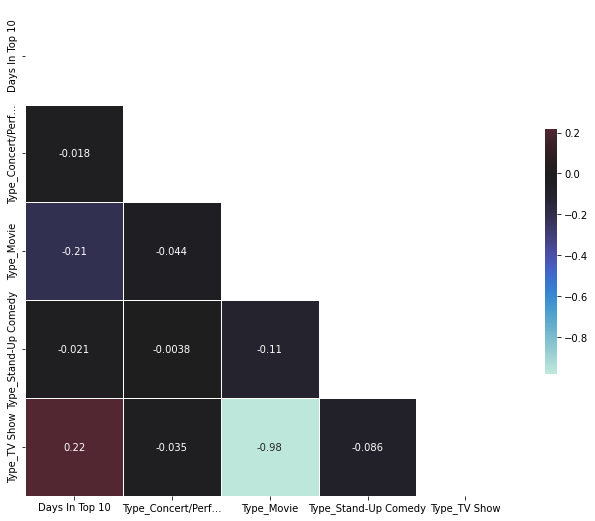

In [301]:
# find correlation for each items

corr = pd.get_dummies(agg_df[['Days In Top 10','Type']]).corr()

mask = np.triu(np.ones_like(corr,dtype=bool))

f, ax = plt.subplots(figsize=(11,9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(data=corr,mask=mask,center=0,square=True,lw=0.5,cbar_kws={"shrink":.5},annot=True)

<AxesSubplot:>

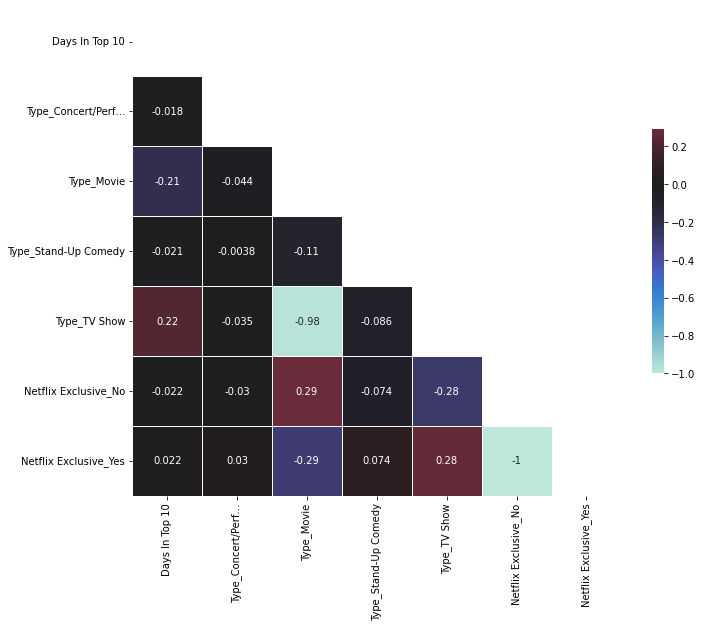

In [337]:
group_by_Type = pd.get_dummies(agg_df[['Days In Top 10','Type','Netflix Exclusive']]).reset_index().corr()
mask = np.triu(np.ones_like(group_by_Type,dtype=bool))

f, ax = plt.subplots(figsize=(11,9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(data=group_by_Type,mask=mask,center=0,square=True,lw=0.5,cbar_kws={"shrink":.5},annot=True)


In [336]:
# Change data type to find corr by attributes
agg_df[['Days In Top 10','Type','Netflix Exclusive']].corr()

,Days In Top 10
Days In Top 10,1.0


In [304]:
cat_df = agg_df.copy()
cat_df['Netflix Exclusive']=agg_df['Netflix Exclusive']=='Yes'
cat_df['Type']=cat_df['Type'].astype('category').cat.codes


In [323]:
cat_df[['Netflix Exclusive','Type','Days In Top 10']].corr()

,Netflix Exclusive,Type,Days In Top 10
Netflix Exclusive,1.000000,0.282309,0.021566
Type,0.282309,1.000000,0.216391
Days In Top 10,0.021566,0.216391,1.000000


,Days In Top 10,Type,Netflix Exclusive
Days In Top 10,1.000000,0.216391,0.021566
Type,0.216391,1.000000,0.282309
Netflix Exclusive,0.021566,0.282309,1.000000


<AxesSubplot:>

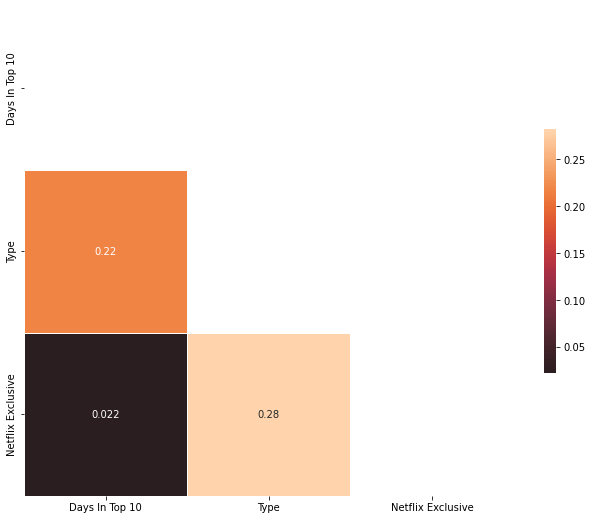

In [306]:
group_by_Type = pd.get_dummies(cat_df[['Days In Top 10','Type','Netflix Exclusive']]).reset_index().corr()
group_by_Type
mask = np.triu(np.ones_like(group_by_Type,dtype=bool))

f, ax = plt.subplots(figsize=(11,9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(data=group_by_Type,mask=mask,center=0,square=True,lw=0.5,cbar_kws={"shrink":.5},annot=True)

In [334]:
pd.crosstab(agg_df['Netflix Exclusive'],agg_df['Type'],margins=False)
pd.crosstab(agg_df['Netflix Exclusive'],agg_df['Type'],margins=False,normalize=True)
pd.crosstab(agg_df['Netflix Exclusive'],agg_df['Type'],margins=False,normalize='index')
pd.crosstab(agg_df['Netflix Exclusive'],agg_df['Type'],margins=False,normalize='columns')

Type,Concert/Perf…,Movie,Stand-Up Comedy,TV Show
Netflix Exclusive,,,,
No,0,175,0,61
Yes,1,180,6,222


Type,Concert/Perf…,Movie,Stand-Up Comedy,TV Show
Netflix Exclusive,,,,
No,0.00000,0.271318,0.000000,0.094574
Yes,0.00155,0.279070,0.009302,0.344186


Type,Concert/Perf…,Movie,Stand-Up Comedy,TV Show
Netflix Exclusive,,,,
No,0.000000,0.741525,0.00000,0.258475
Yes,0.002445,0.440098,0.01467,0.542787


Type,Concert/Perf…,Movie,Stand-Up Comedy,TV Show
Netflix Exclusive,,,,
No,0.0,0.492958,0.0,0.215548
Yes,1.0,0.507042,1.0,0.784452


,As of,Rank,Year to Date Rank,Last Week Rank,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score,Year,Month
Title,,,,,,,,,,,
Cocomelon,2022-03-01,10,9,9,TV Show,No,2020-06-01,428,1474,2020,6
Ozark,2022-03-01,10,9,9,TV Show,Yes,2017-07-21,89,536,2017,7
Cobra Kai,2022-01-28,10,9,8,TV Show,No,2020-08-28,81,582,2020,8
Manifest,2021-09-17,10,9,7,TV Show,No,2021-06-10,80,590,2021,6
The Queenâs Gambit,2021-01-06,10,9,9,TV Show,Yes,2020-10-23,73,446,2020,10
...,...,...,...,...,...,...,...,...,...,...,...
Dark Shadows,2022-01-05,10,-,-,Movie,No,2022-01-01,1,1,2022,1
Elves,2021-11-29,8,-,-,TV Show,Yes,2021-11-28,1,3,2021,11
Rango,2021-01-01,8,-,-,Movie,No,2020-12-28,1,3,2020,12


### Use of Scipy to see the indenpendence relationship

In [346]:
for i in agg_df['Type'].unique():
    temp = agg_df.copy()
    temp['TempType']= agg_df['Type'].apply(
        lambda x:i if x== i else f"Not{i}"
    )

    temp_crosstab = pd.crosstab(
        temp['TempType'],agg_df['Netflix Exclusive'], margins = False
    )

    c, p, dof, expected = chi2_contingency(temp_crosstab)

    p = round(p,2)

    if p == 1.0:
        print(f'not enough info for {i}')
    elif p<0.05:
        print(f'{i} and Netflix Exclusive ARE Indenpendent')
    else:
        print(f'{i} and Netflix Exclusive are NOT indenpendent')


TV Show and Netflix Exclusive ARE Indenpendent
Movie and Netflix Exclusive ARE Indenpendent
Stand-Up Comedy and Netflix Exclusive are NOT indenpendent
not enough info for Concert/Perf…
